In [ ]:
%reload_ext autoreload
%autoreload 2

### Scores for bias Gen

./Final_Test_MetricsBase_CNN_Part2_aug_3.npz
             precision recall  f1-score   accuary
cloth         0.813725   0.83  0.821782  0.848739
no_face       0.851485   0.86  0.855721  0.873913
surgical         0.825  0.825     0.825  0.851064
n95            0.88601  0.855  0.870229  0.885135
incorrect     0.900498  0.905  0.902743  0.911364
                                                 
weighted avg  0.855344  0.855  0.855095          
Overall acc:  0.855


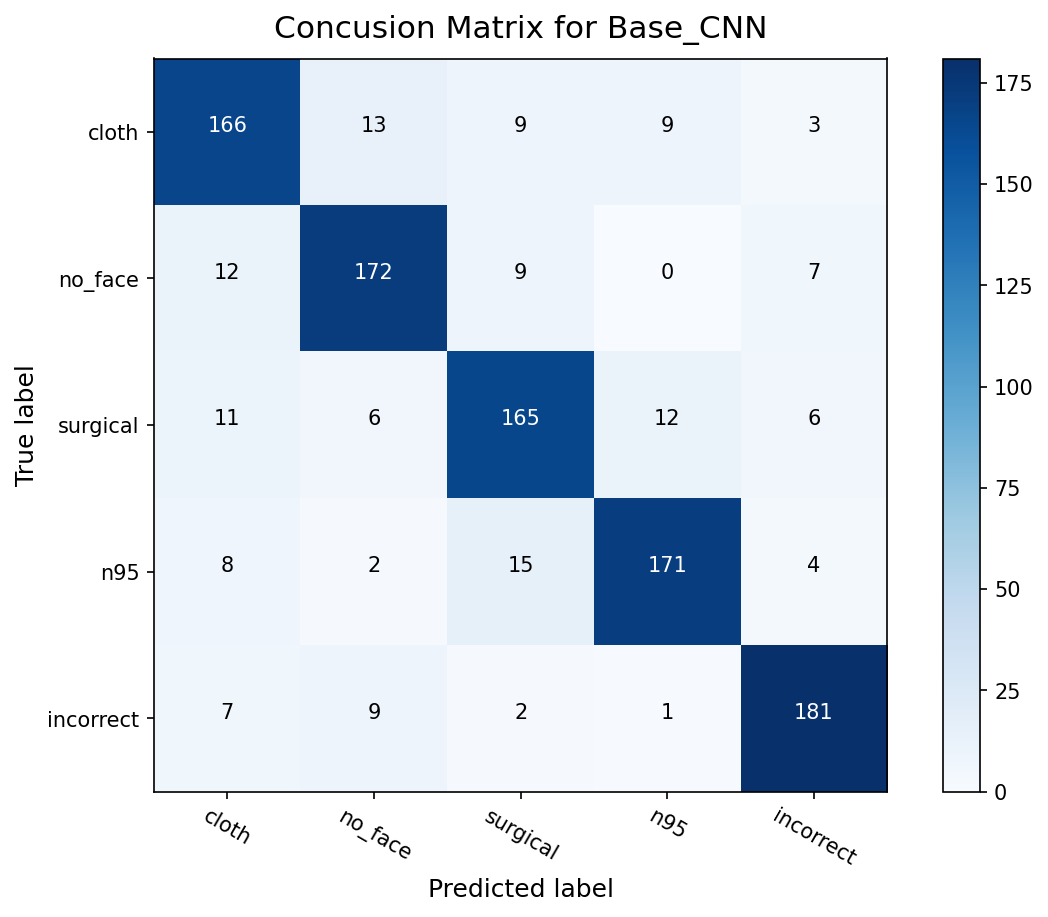

./Final_Test_MetricsBase_CNN_Part2_aug_3.npz
             precision    recall  f1-score   accuary bias(fm - m)
cloth_m       0.831683  0.933333  0.879581  0.892523             
cloth_fm      0.796117  0.745455  0.769953  0.812977   -0.0795463
no_face_m     0.913978  0.841584  0.876289  0.889908             
no_face_fm    0.798165  0.878788  0.836538  0.859504   -0.0304041
surgical_m    0.822917  0.868132   0.84492  0.865741             
surgical_fm   0.826923  0.788991  0.807512  0.838583   -0.0271581
n95_m         0.910112  0.880435  0.895028     0.905             
n95_fm        0.865385  0.833333  0.849057  0.868852   -0.0361475
incorrect_m   0.929412  0.877778  0.902857  0.911458             
incorrect_fm   0.87931  0.927273  0.902655   0.91129 -0.000168011
                                                                 
weighted avg  0.856338     0.855  0.854676                       
Overall acc:  0.855


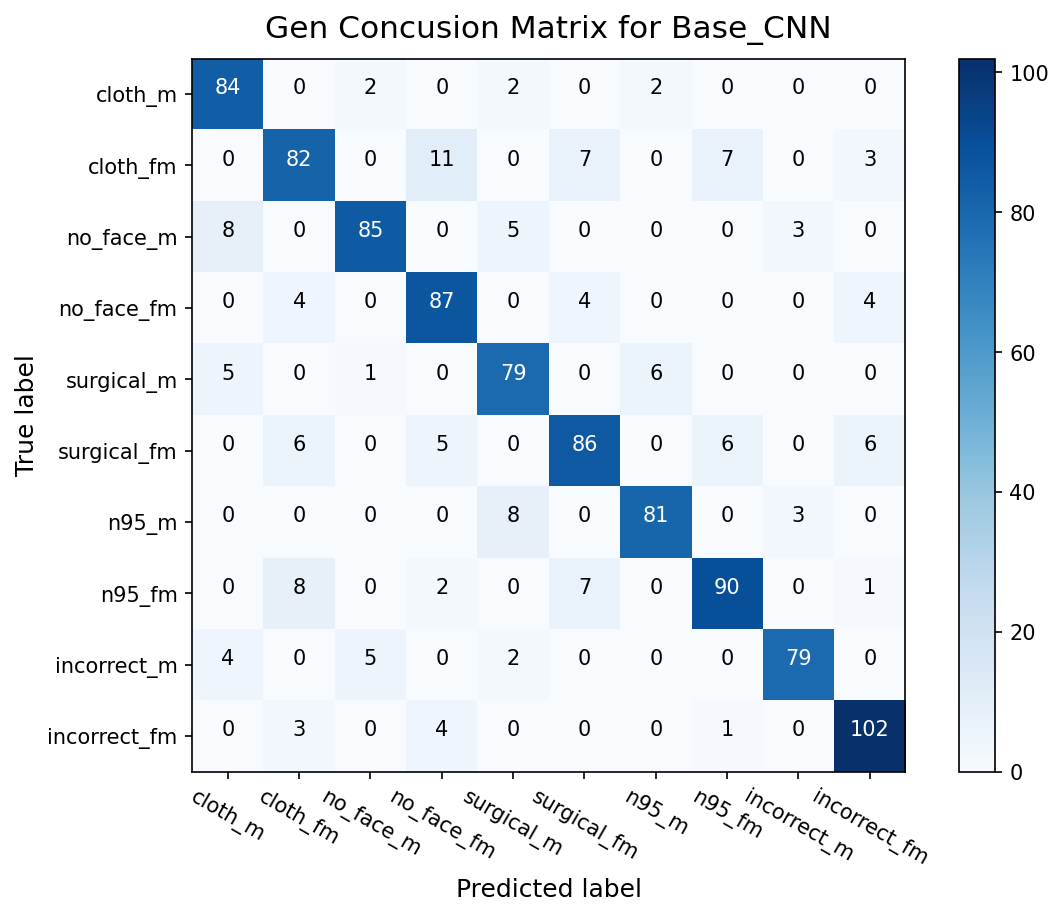

./Final_Test_MetricsBase_CNN_Part2_aug_3.npz
               precision    recall  f1-score   accuary bias(afar - caas)
cloth_caas         0.775     0.775     0.775  0.816327                  
cloth_afar      0.869048    0.9125  0.890244  0.901099         0.0847724
no_face_caas    0.781513  0.885714  0.830357  0.854962                  
no_face_afar    0.951807  0.831579   0.88764   0.89899         0.0440281
surgical_caas       0.75      0.75      0.75       0.8                  
surgical_afar     0.9375    0.9375    0.9375  0.941176          0.141176
n95_caas        0.846847  0.783333  0.813853  0.843066                  
n95_afar        0.939024    0.9625  0.950617  0.952941          0.109875
incorrect_caas  0.911111  0.878571  0.894545  0.904605                  
incorrect_afar  0.878788  0.966667  0.920635  0.926471         0.0218653
                                                                        
weighted avg    0.857031     0.855  0.854919                            
Overal

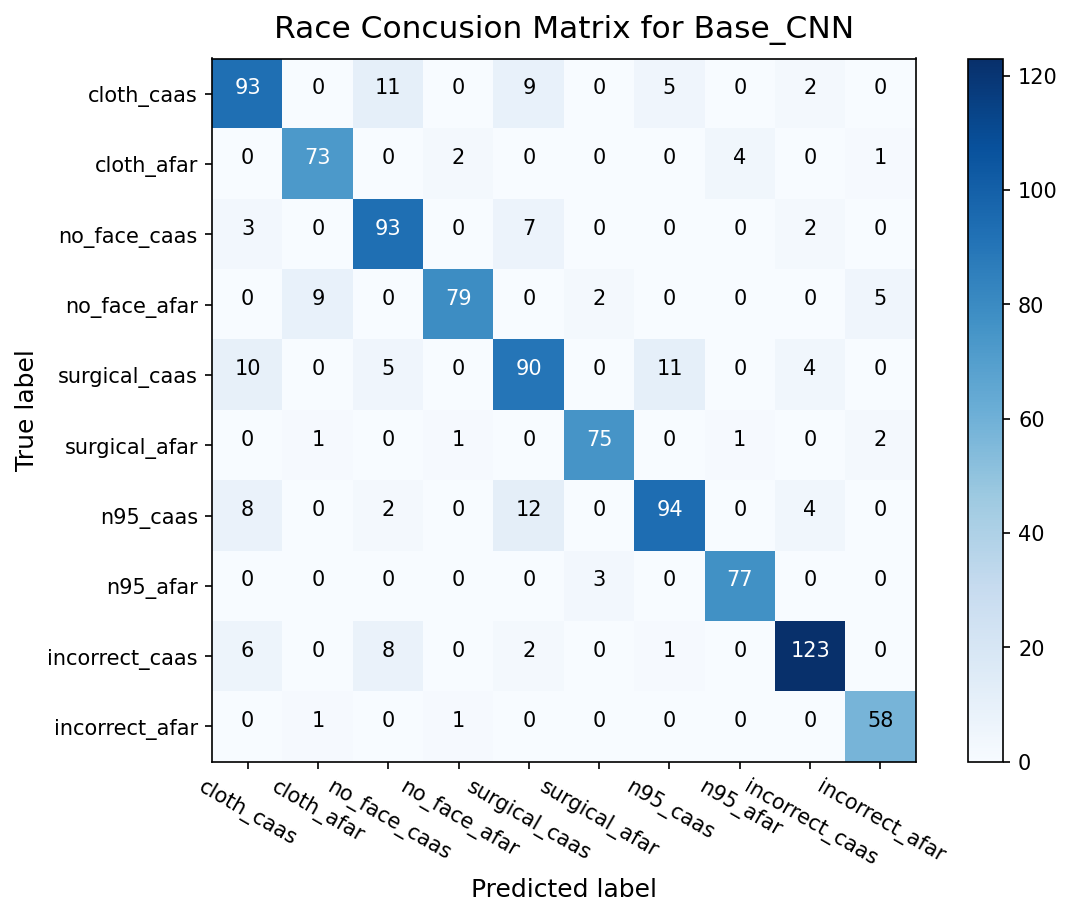

In [1]:
import evaluation

metrics_file_path = './Final_Test_MetricsBase_CNN_Part2_aug_3.npz'

evaluation.read_socres(metrics_file_path, conf_m_title='Concusion Matrix for Base_CNN')
evaluation.read_socres_gen(metrics_file_path, conf_m_title='Gen Concusion Matrix for Base_CNN')
evaluation.read_socres_race(metrics_file_path, conf_m_title='Race Concusion Matrix for Base_CNN')

In [2]:
import torch
import numpy as np
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as T
import matplotlib.pyplot as plt

from data_process.DatasetHelper import label_map
from data_process.DatasetHelper import label_map_new
from data_process.DatasetHelper import ImageDataset

data = ImageDataset('./data/aug_3')
data_loader = torch.utils.data.DataLoader(data, batch_size=100000, shuffle=True, num_workers=1)

for data, labels in data_loader:
    data_X, data_y = data.float(), labels
    
data_y = data_y.numpy()

label: 0 with 1000 images, named as "cloth_mask"
label: 1 with 1000 images, named as "no_face_mask"
label: 2 with 1000 images, named as "surgical_mask"
label: 3 with 1000 images, named as "n95_mask"
label: 4 with 1000 images, named as "mask_worn_incorrectly"


In [3]:
from evaluation import downgrade_argmax_target_to_gen, mask_label_name_list
from data_process.DatasetHelper import label_map_new_gen

gen_label_list = [downgrade_argmax_target_to_gen(y) for y in data_y]

d = {}

for l in gen_label_list:
    l_name = label_map_new_gen[l]
    if d.get(l_name) == None:
        d[l_name] = 0
    d[l_name] += 1

print(d)

gen_arr = {'m': [d[mask_male_label] for mask_male_label in [l + '_m' for l in mask_label_name_list]], 
           'fm': [d[mask_male_label] for mask_male_label in [l + '_fm' for l in mask_label_name_list]]}

bias = []

for i in range(5):
    bias.append(gen_arr['fm'][i] - gen_arr['m'][i])
    
gen_arr['bias(fm - m)'] = bias

import pandas as pd
df = pd.DataFrame(data=gen_arr, index=mask_label_name_list)

df

{'no_face_mask_fm': 496, 'surgical_mask_m': 456, 'n95_mask_m': 461, 'cloth_mask_fm': 550, 'n95_mask_fm': 539, 'mask_worn_incorrectly_fm': 547, 'no_face_mask_m': 504, 'cloth_mask_m': 450, 'mask_worn_incorrectly_m': 453, 'surgical_mask_fm': 544}


,m,fm,bias(fm - m)
cloth_mask,450,550,100
no_face_mask,504,496,-8
surgical_mask,456,544,88
n95_mask,461,539,78
mask_worn_incorrectly,453,547,94


In [4]:
from evaluation import downgrade_argmax_target_to_race, mask_label_name_list
from data_process.DatasetHelper import label_map_new_race
race_label_list = [downgrade_argmax_target_to_race(y) for y in data_y]

d = {}

for l in race_label_list:
    l_name = label_map_new_race[l]
    if d.get(l_name) == None:
        d[l_name] = 0
    d[l_name] += 1

print(d)

race_arr = {'caas': [d[mask_male_label] for mask_male_label in [l + '_caas' for l in mask_label_name_list]], 
           'afar': [d[mask_male_label] for mask_male_label in [l + '_afar' for l in mask_label_name_list]]}

bias = []

for i in range(5):
    bias.append(race_arr['afar'][i] - race_arr['caas'][i])
    
race_arr['bias(afar - caas)'] = bias

import pandas as pd
df = pd.DataFrame(data=race_arr, index=mask_label_name_list)

df

{'no_face_mask_caas': 525, 'surgical_mask_caas': 600, 'n95_mask_afar': 400, 'n95_mask_caas': 600, 'no_face_mask_afar': 475, 'cloth_mask_afar': 400, 'mask_worn_incorrectly_caas': 700, 'cloth_mask_caas': 600, 'surgical_mask_afar': 400, 'mask_worn_incorrectly_afar': 300}


,caas,afar,bias(afar - caas)
cloth_mask,600,400,-200
no_face_mask,525,475,-50
surgical_mask,600,400,-200
n95_mask,600,400,-200
mask_worn_incorrectly,700,300,-400
